<a href="https://colab.research.google.com/github/askuts/boost-tinkoff/blob/main/data_visual_boost_tinkoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# задача с конкурса Tinkoff: https://boosters.pro/championship/tinkoff1/overview
#Датасет содержит данные о кредитах на покупку электроники, которые были одобрены Tinkoff.ru.
# Необходимо предсказать, выберет ли покупатель кредит от Tinkoff.ru
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/output_data.csv', encoding='cp1251')

In [72]:
# смотрим на первые пять строк
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,education_encoded
0,0,34.0,Unknown,UMN,59998.00,10,1.6,0.461439,РєСЂР°СЃРЅРѕРґР°СЂСЃРєРёР№,30000.0,1.0,1.0,0,2
1,1,34.0,MAR,UMN,10889.00,6,1.1,0.461439,РјРѕСЃРєРІР°,35000.0,2.0,0.0,0,-1
2,0,32.0,MAR,SPC,10728.00,12,1.1,0.461439,СЃР°СЂР°С‚РѕРІСЃРєР°СЏ,35000.0,5.0,0.0,0,-1
3,1,27.0,Unknown,SPC,12009.09,12,1.1,0.461439,РІРѕР»РіРѕРіСЂР°РґСЃРєР°СЏ,35000.0,2.0,0.0,0,-1
4,0,45.0,Unknown,SPC,21211.50,10,1.1,0.421385,С‡РµР»СЏР±РёРЅСЃРєР°СЏ,35000.0,1.0,0.0,0,0


In [73]:
#проверяем типы данных и заполненность столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133200 entries, 0 to 133199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                133200 non-null  int64  
 1   age                   133200 non-null  float64
 2   marital_status        133200 non-null  object 
 3   job_position          133200 non-null  object 
 4   credit_sum            133200 non-null  float64
 5   credit_month          133200 non-null  int64  
 6   tariff_id             133200 non-null  float64
 7   score_shk             133200 non-null  float64
 8   living_region         133200 non-null  object 
 9   monthly_income        133200 non-null  float64
 10  credit_count          133200 non-null  float64
 11  overdue_credit_count  133200 non-null  float64
 12  open_account_flg      133200 non-null  int64  
 13  education_encoded     133200 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 14.

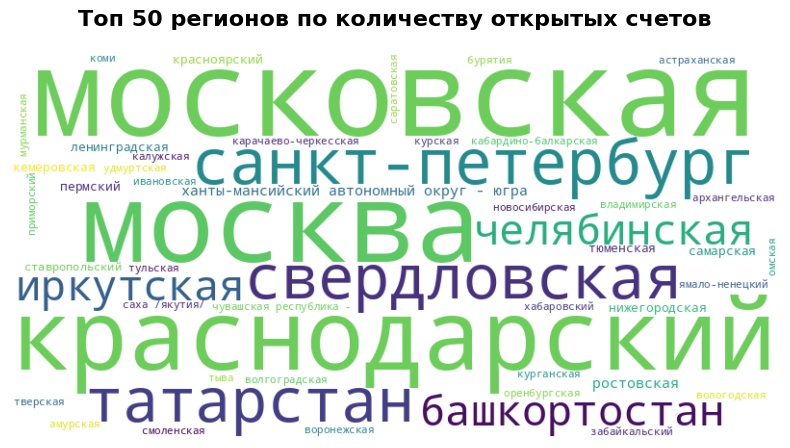

In [46]:
from wordcloud import WordCloud

region_credit_counts = data.groupby('living_region')['open_account_flg'].sum().sort_values(ascending=False).head(50)

# Создаем словарь, где ключ - регион, значение - количество open_account_flg
wordcloud_data = dict(zip(region_credit_counts.index, region_credit_counts.values))

# Создаем облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Выводим график
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Выводим заголовок жирным шрифтом, отделенный от графика
plt.title('Топ 50 регионов по количеству открытых счетов', fontsize=16, fontweight='bold', y=1.05)

plt.show()

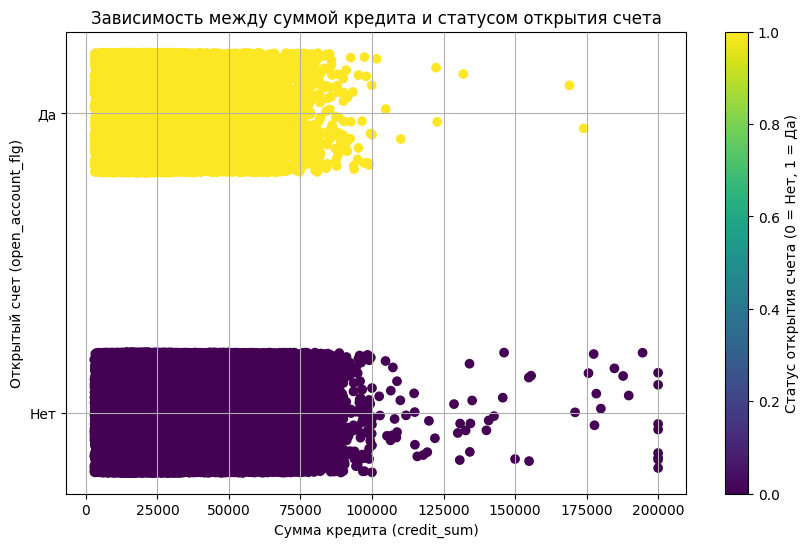

In [57]:
# Создание случайных небольших отклонений для более равномерного распределения вдоль оси Y
jitter = np.random.uniform(-0.2, 0.2, len(data['open_account_flg']))

# Создание графика зависимости между суммой кредита и статусом открытого счета
plt.figure(figsize=(10, 6))
plt.scatter(data['credit_sum'], data['open_account_flg'] + jitter, c=data['open_account_flg'], cmap='viridis')
plt.xlabel('Сумма кредита (credit_sum)')
plt.ylabel('Открытый счет (open_account_flg)')
plt.title('Зависимость между суммой кредита и статусом открытия счета')
plt.colorbar(label='Статус открытия счета (0 = Нет, 1 = Да)')
plt.yticks([0, 1], ['Нет', 'Да'])  # Устанавливаем метки на оси y для значений 0 и 1
plt.grid(True)
plt.show()

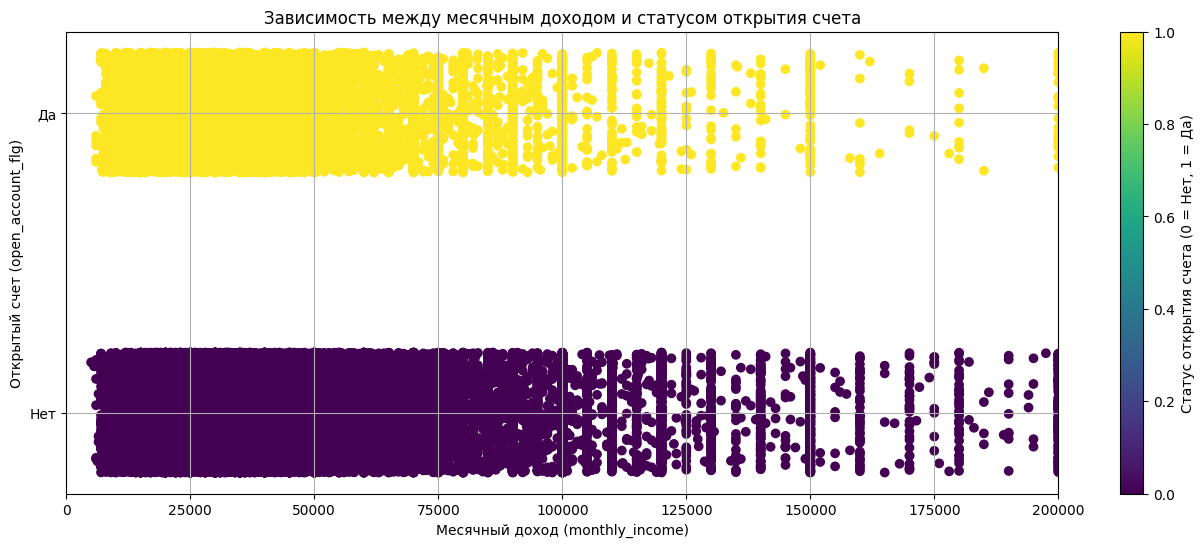

In [61]:
# Создание случайных небольших отклонений для более равномерного распределения вдоль оси Y
jitter = np.random.uniform(-0.2, 0.2, len(data['open_account_flg']))

# Создание графика зависимости между суммой кредита и статусом открытого счета
plt.figure(figsize=(16, 6))
plt.scatter(data['monthly_income'], data['open_account_flg'] + jitter, c=data['open_account_flg'], cmap='viridis')
plt.xlabel('Месячный доход (monthly_income)')
plt.ylabel('Открытый счет (open_account_flg)')
plt.title('Зависимость между месячным доходом и статусом открытия счета')
plt.colorbar(label='Статус открытия счета (0 = Нет, 1 = Да)')
plt.yticks([0, 1], ['Нет', 'Да'])  # Устанавливаем метки на оси y для значений 0 и 1

# Ограничение по оси X до уровня дохода 400000
plt.xlim(0, 200000)

plt.grid(True)
plt.show()

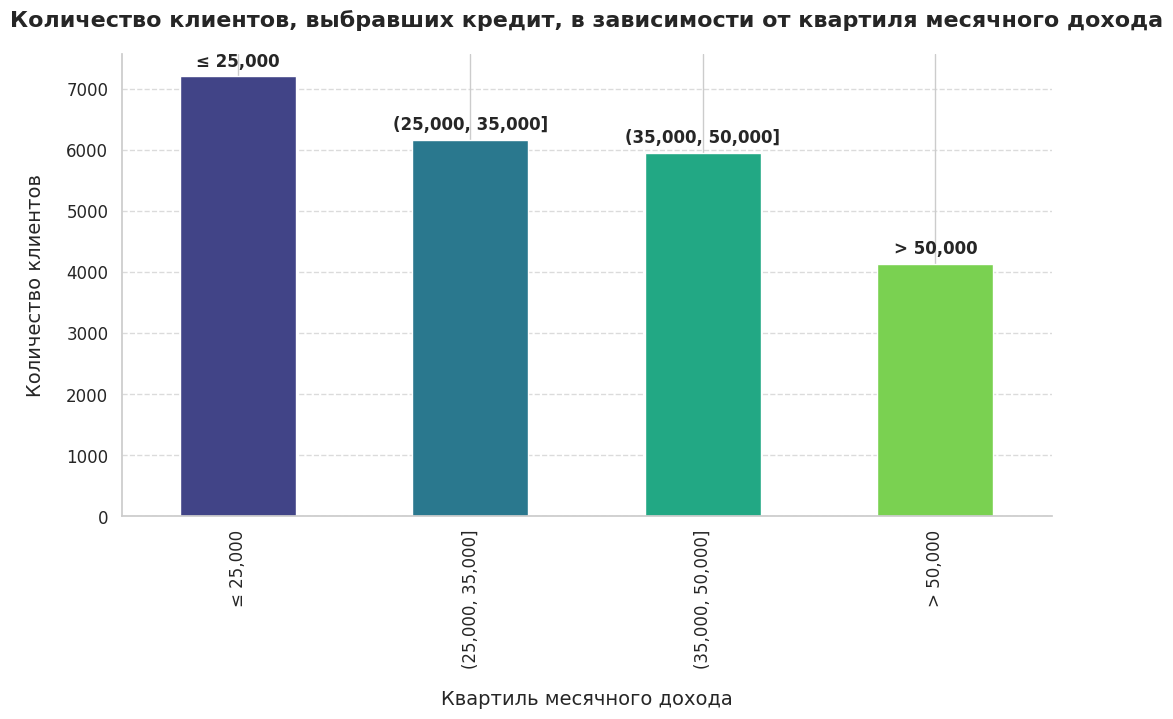

In [66]:
import seaborn as sns

# Расчет квартилей по месячному доходу
quartiles = data['monthly_income'].quantile([0.25, 0.5, 0.75])

# Создаем список с границами квартилей для отображения
quartile_labels = [
    f'≤ {quartiles[0.25]:,.0f}',
    f'({quartiles[0.25]:,.0f}, {quartiles[0.5]:,.0f}]',
    f'({quartiles[0.5]:,.0f}, {quartiles[0.75]:,.0f}]',
    f'> {quartiles[0.75]:,.0f}'
]

# Добавляем столбец для определения квартиля каждого клиента
data['income_quartile'] = pd.cut(data['monthly_income'], bins=[-float("inf"), quartiles[0.25], quartiles[0.5], quartiles[0.75], float("inf")], labels=quartile_labels)

# Смотрим распределение по квартилям среди тех, кто выбрал кредит (open_account_flg = 1)
credit_by_quartile = data[data['open_account_flg'] == 1]['income_quartile'].value_counts()

# Визуализация данных
plt.figure(figsize=(12, 6))

# Используем стиль seaborn
sns.set(style="whitegrid")

# Визуализация данных с более яркой палитрой
colors = sns.color_palette("viridis", len(credit_by_quartile))
ax = credit_by_quartile.plot(kind='bar', color=colors)

# Добавляем аннотации с границами квартилей над каждым столбцом
for index, value in enumerate(credit_by_quartile):
    plt.text(index, value + 100, quartile_labels[index], ha='center', va='bottom', fontsize=12, fontweight='bold')

# Настройка меток и заголовков
plt.xlabel('Квартиль месячного дохода', fontsize=14, labelpad=15)
plt.ylabel('Количество клиентов', fontsize=14, labelpad=15)
plt.title('Количество клиентов, выбравших кредит, в зависимости от месячного дохода', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Удаление верхней и правой границы графика для минималистичного вида
sns.despine()

plt.show()

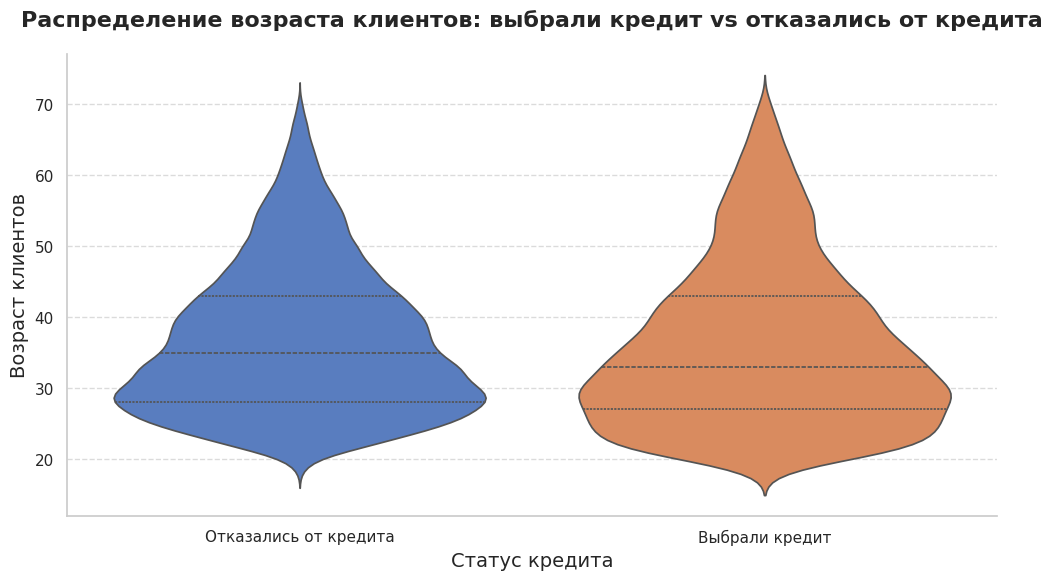

In [77]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns

# Создание графика с уплотнением (violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='open_account_flg', y='age', data=data, palette='muted', inner='quartile')

# Настройка меток и заголовка
plt.xticks([0, 1], ['Отказались от кредита', 'Выбрали кредит'])  # Переименовываем ось X
plt.xlabel('Статус кредита', fontsize=14)
plt.ylabel('Возраст клиентов', fontsize=14)
plt.title('Распределение возраста клиентов: выбрали кредит vs отказались от кредита', fontsize=16, fontweight='bold', pad=20)

plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.show()


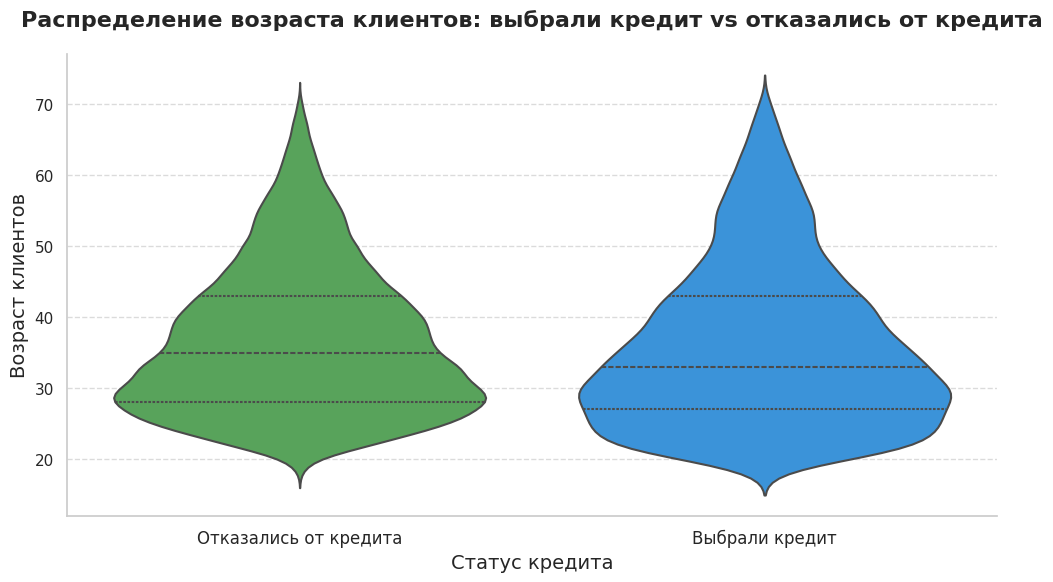

In [82]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
import seaborn as sns

# Установка стиля графиков
sns.set(style="whitegrid")

# Создание графика с уплотнением (violin plot)
plt.figure(figsize=(12, 6))
sns.violinplot(x='open_account_flg', y='age', data=data, palette=['#4CAF50', '#2196F3'], inner='quartile', linewidth=1.5)

# Настройка меток и заголовка
plt.xticks([0, 1], ['Отказались от кредита', 'Выбрали кредит'], fontsize=12)  # Переименовываем ось X
plt.xlabel('Статус кредита', fontsize=14)
plt.ylabel('Возраст клиентов', fontsize=14)
plt.title('Распределение возраста клиентов: выбрали кредит vs отказались от кредита', fontsize=16, fontweight='bold', pad=20)

# Добавление сетки
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Удаление верхней и правой границы графика для минималистичного вида
sns.despine()

# Отображение графика
plt.show()


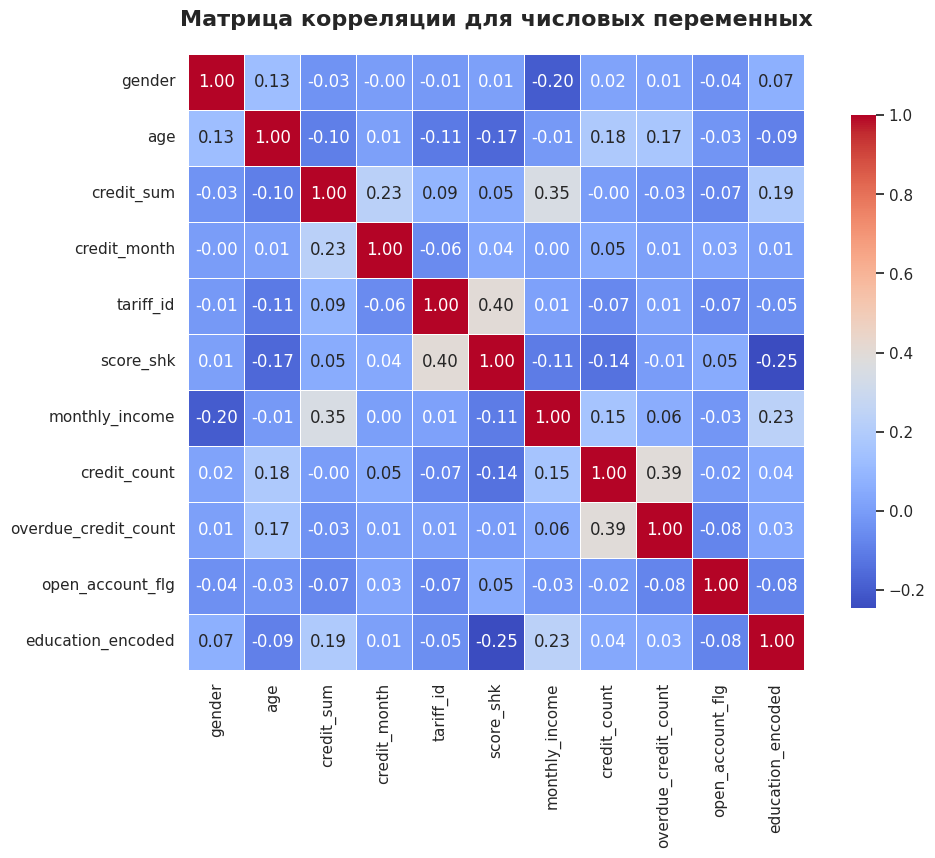

In [89]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем только числовые переменные
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Вычисление матрицы корреляции для числовых переменных
correlation_matrix = numeric_data.corr()

# Настройка графика
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Настройка заголовка
plt.title('Матрица корреляции для числовых переменных', fontsize=16, fontweight='bold', pad=20)

# Отображение графика
plt.show()

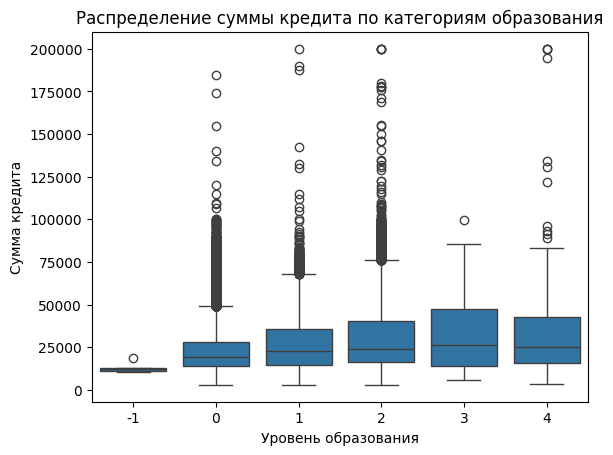

In [26]:
sns.boxplot(x='education_encoded', y='credit_sum', data=data)
plt.xlabel('Уровень образования')
plt.ylabel('Сумма кредита')
plt.title('Распределение суммы кредита по категориям образования')
plt.show()